In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = pd.read_csv("iris.csv")
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [47]:
from sklearn.metrics import accuracy_score
class GNBayes:

    def __init__(self,variant):
        self.variant = variant
        self.covmat = []
        self.prior = []
        self.mean_mat = []

    def Train(self,X,y):
        d = len(X.columns)
        yname = y.columns[0]
        unique_val = len(np.unique(list(y[yname])))
#         print(unique_val)
        for i in range(unique_val):
            tempdf = X.iloc[y[y[yname]==i].index.to_list(),:]
            mean_matrix = [np.mean(tempdf[i]) for i in tempdf.columns]
            self.mean_mat.append(mean_matrix)
            self.prior.append(len(y[y[yname] == i])/len(y))
            if(self.variant == 3):
                ithcovmat = np.cov(np.array(tempdf).transpose())
                self.covmat.append(ithcovmat)
            if(self.variant == 1):
                arr = np.zeros((d,d))
                for i in range(d):
                    arr[i,i] = df[df.columns[i]].var()
                ithcovmat = np.identity(d)
                self.covmat.append(ithcovmat)
            if(self.variant == 2):
                ithcovmat = np.cov(X.transpose())
                self.covmat.append(ithcovmat)
        return 
    
    def g(self,x,y):
        x = np.array(x)
        mat1 = np.subtract(x,self.mean_mat[y]).transpose()
        mat2 = np.linalg.inv(self.covmat[y])
        mat3 = np.subtract(x,self.mean_mat[y])
        mat4 = np.dot(mat1,mat2)
        product = np.dot(mat4,mat3)*(-0.5)
        product += np.log(np.linalg.det(self.covmat[y]))*(-0.5)
        product += np.log(self.prior[y])
        return product
    
    def Predict(self,x):
        max_probab = -1e5;
        pred = -1
        for i in range(len(self.prior)):
            p = self.g(x,i)
            if(p > max_probab):
                pred = i
                max_probab = p
        return pred
    def predict(self,X):
        pred = []
#         X = np.array(X)
        row = X.shape[0]
        for i in range(row):
            pred.append(self.Predict(np.array(X[i,:])))
        return pred
    def Test(self,X,y):
        pred = []
        print(type(X))
        X = np.array(X)
        row = X.shape[0]
#         print(self.covmat)
        for i in range(row):
            pred.append(self.Predict(np.array(X[i,:])))
        return pred,accuracy_score(y,pred)
    def sample(df):
        sample = pd.DataFrame()
        for i in df.columns:
            sample[i] = [random.uniform(min(df[i]),max(df[i])) for x in range(10000)]
        return sample
    
    def plotDecisionBoundary(self,X):
        h = .02  # step size in the mesh
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # predict the class label for the entire mesh
        Z = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()]))

        # plot the decision boundary
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        sns.scatterplot(x = X.columns[0],y = X.columns[1],hue = X.columns[-1],data = df,cmap = plt.cm.Paired)
        plt.scatter(self.mean_mat[0][0],self.mean_mat[0][1],c = 'red')
        plt.scatter(self.mean_mat[1][0],self.mean_mat[1][1],c = 'red')
#         plt.scatter(self.mean_mat[2][0],self.mean_mat[2][1],c = 'red')

        plt.plot([self.mean_mat[0][0],self.mean_mat[1][0]],[self.mean_mat[0][1],self.mean_mat[1][1]],c = 'black')
#         plt.plot([self.mean_mat[2][0],self.mean_mat[1][0]],[self.mean_mat[2][1],self.mean_mat[1][1]],c = 'black')
#         plt.plot([self.mean_mat[2][0],self.mean_mat[0][0]],[self.mean_mat[2][1],self.mean_mat[0][1]],c = 'black')
        plt.title("Variant "+str(self.variant))
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()


        
        
    

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      150 non-null    float64
 1   x2      150 non-null    float64
 2   x3      150 non-null    float64
 3   x4      150 non-null    float64
 4   y       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
y     0
dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

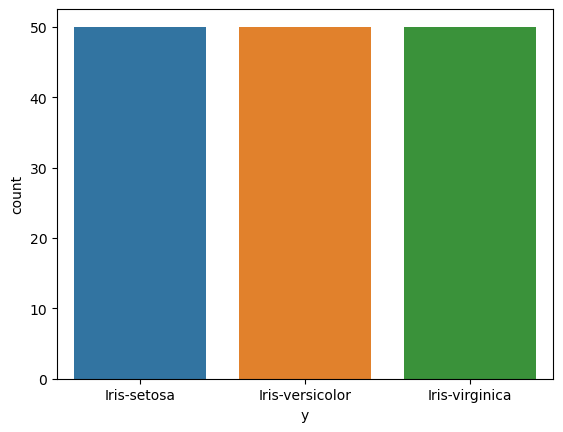

In [4]:
import seaborn as sns
sns.countplot(data = df,x = "y")

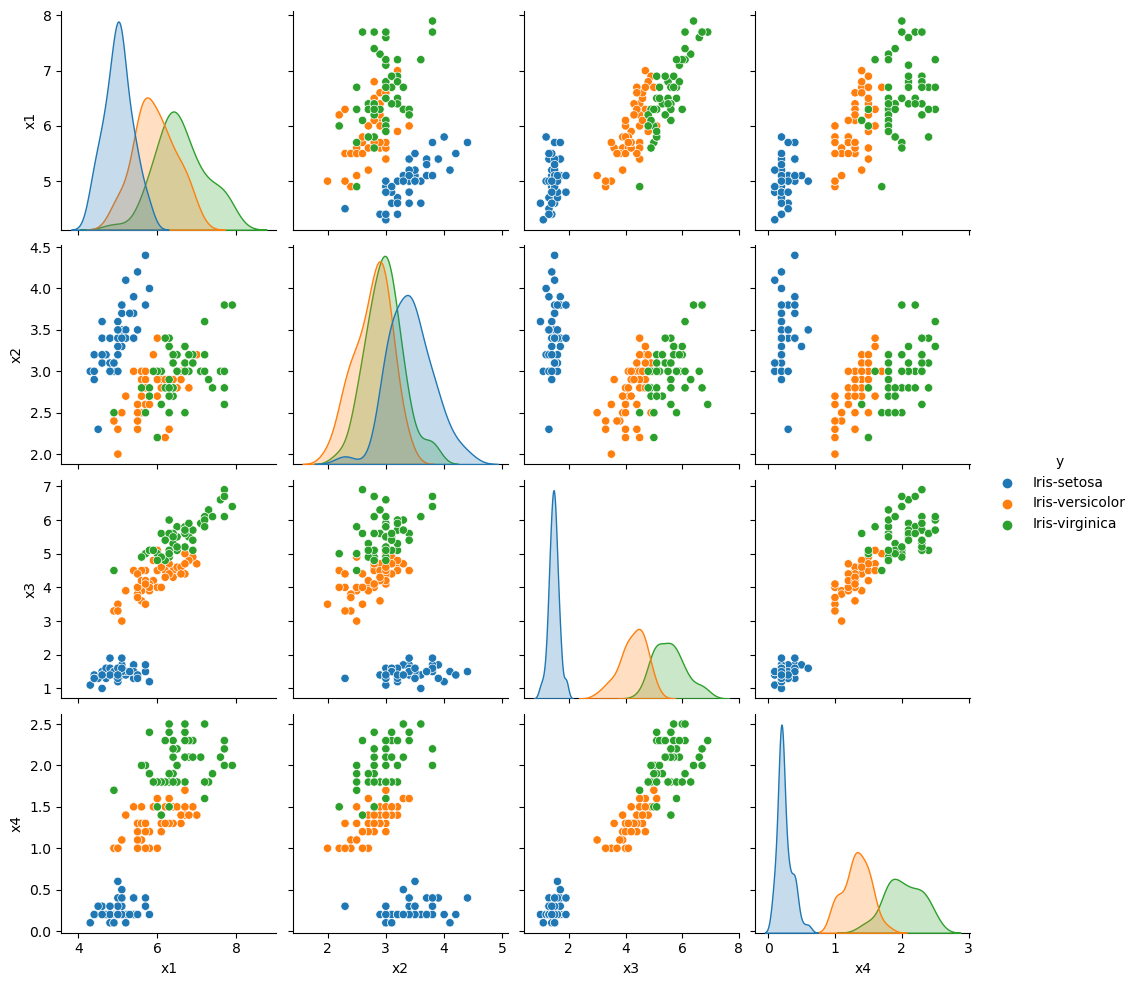

In [5]:
sns.pairplot(df,hue = "y")

In [6]:
df.corr()

,x1,x2,x3,x4
x1,1.000000,-0.109369,0.871754,0.817954
x2,-0.109369,1.000000,-0.420516,-0.356544
x3,0.871754,-0.420516,1.000000,0.962757
x4,0.817954,-0.356544,0.962757,1.000000


Ther exist a high correlation between (x1 x4) ; (x1,x3) ; (x3,x4) so we will drop x4 and x4


In [7]:
df.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.drop(["x3","x4"],axis = 1)
df.head()

,x1,x2,y
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


<AxesSubplot:xlabel='x2', ylabel='Density'>

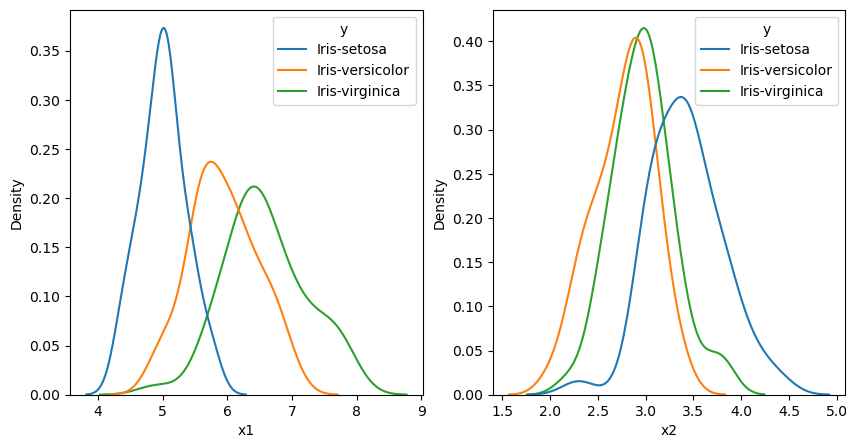

In [9]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.kdeplot(data = df,x = "x1",hue = "y")
plt.subplot(1,2,2)
sns.kdeplot(data = df,x = "x2",hue = "y")

In [10]:
le = LabelEncoder()
df["y"] = le.fit_transform(df["y"])
df_train,df_test = train_test_split(df,train_size=0.7)
df_train.index = [i for i in range(len(df_train))]
df_test.index = [i for i in range(len(df_test))]
x_train,y_train = df_train.drop(["y"],axis = 1),df_train[["y"]]
x_test,y_test = df_test.drop(["y"],axis = 1),df_test[["y"]]
tempdf = df.iloc[y_train[y_train["y"]==0].index.to_list(),:]
len(x_train),len(y_train)

(105, 105)

In [11]:
type(y_train)

pandas.core.frame.DataFrame

In [12]:
x_train.head()

,x1,x2
0,6.7,3.0
1,6.1,2.9
2,5.1,3.8
3,5.5,4.2
4,6.0,2.9


In [14]:
import random

<class 'pandas.core.frame.DataFrame'>
[1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0]
accuracy  0.7333333333333333


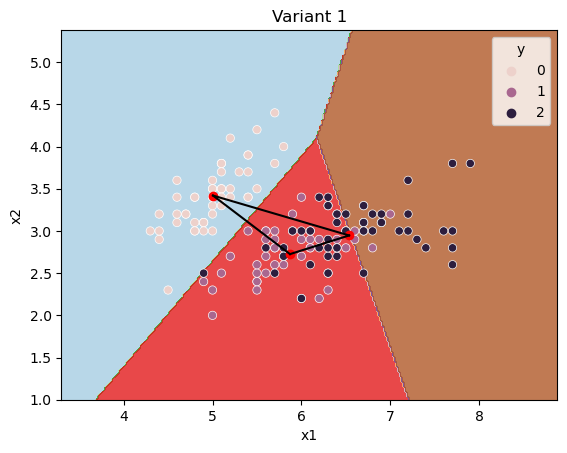

In [15]:
clf = GNBayes(1)
clf.Train(x_train,y_train)
prediction = clf.Test(x_test,y_test)
print(prediction[0])
print("accuracy ",prediction[1])
clf.plotDecisionBoundary(df)
# print(clf.covmat)
# print(clf.covmat)

<class 'pandas.core.frame.DataFrame'>
[1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0]
accuracy  0.7333333333333333


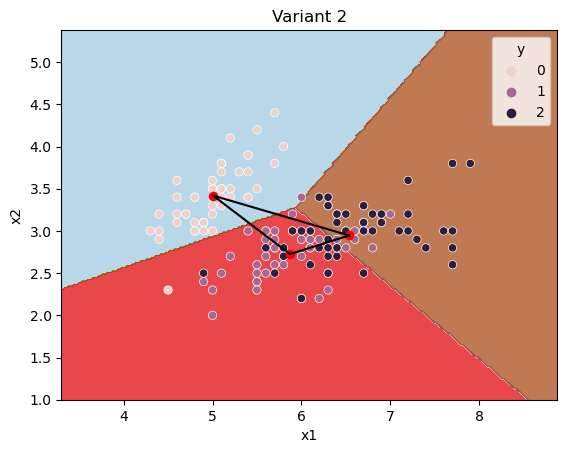

In [16]:
clf2 = GNBayes(2)
clf2.Train(x_train,y_train)

prediction2 = clf2.Test(x_test,y_test) 
print(prediction2[0])

print("accuracy ",prediction2[1])

clf2.plotDecisionBoundary(df)

<class 'pandas.core.frame.DataFrame'>
[1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0]
accuracy  0.6888888888888889


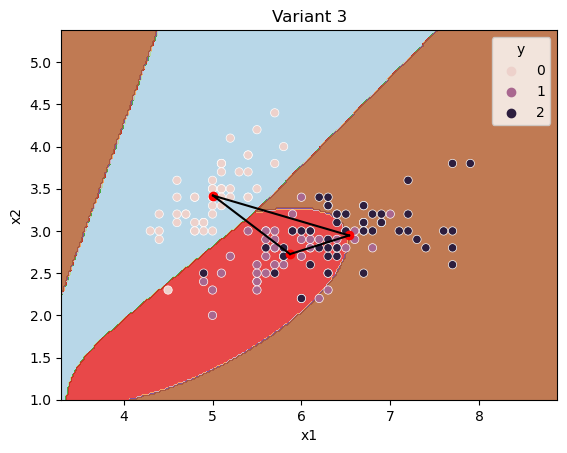

In [17]:
clf3 = GNBayes(3)
clf3.Train(x_train,y_train)

prediction = clf3.Test(x_test,y_test) 
print(prediction[0])
print("accuracy ",prediction[1])
# print(clf3.covmat)
clf3.plotDecisionBoundary(df)

In [18]:

#calculating indexes for dividing dataset

def bestSplit(X,y,k,variant):
    
#     div = (divisions(x,k))
    errors = []
    models = []
    kf = StratifiedKFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kf.split(X,y)):
        clf = GNBayes(variant)
        x_train = X.iloc[train_index,:]
        y_train = y.iloc[train_index,:]
        x_test = X.iloc[test_index,:]
        y_test = y.iloc[test_index,:]
        x_train.index = [i for i in range(len(x_train))]
        y_train.index = [i for i in range(len(y_train))]
        x_test.index = [i for i in range(len(x_test))]
        y_test.index = [i for i in range(len(y_test))]
        clf.Train(x_train,y_train)
        errors.append(clf.Test(x_test,y_test)[1])
    return errors,models

In [19]:
from sklearn.utils import shuffle
df = pd.read_csv("iris.csv")
# df = shuffle(df)
# df.index = [i for i in range(len(df))]
x = df.drop(["x3","x4","y"],axis = 1)
le = LabelEncoder()
df["y"] = le.fit_transform(df["y"])
y = df[["y"]]


In [20]:
errors,_ = bestSplit(x,y,5,1)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [21]:
print(errors)
print("avg accuracy :",np.mean(errors))
print("variance of accuracy :",np.var(errors))

[0.7333333333333333, 0.8666666666666667, 0.7666666666666667, 0.8666666666666667, 0.8666666666666667]
avg accuracy : 0.82
variance of accuracy : 0.0033777777777777803


In [22]:
errors,_ = bestSplit(x,y,5,2)
errors
print(errors)
print("avg accuracy :",np.mean(errors))
print("variance of accuracy :",np.var(errors))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
[0.7333333333333333, 0.8333333333333334, 0.7333333333333333, 0.8333333333333334, 0.8666666666666667]
avg accuracy : 0.8
variance of accuracy : 0.0031111111111111157


In [23]:
errors,_ = bestSplit(x,y,5,3)
print(errors)
print("avg accuracy :",np.mean(errors))
print("variance of accuracy :",np.var(errors))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
[0.7, 0.8666666666666667, 0.7333333333333333, 0.8, 0.8333333333333334]
avg accuracy : 0.7866666666666666
variance of accuracy : 0.003822222222222227


# SyntheticCircular data


In [24]:
df["x1"].var()

0.6856935123042505

<AxesSubplot:xlabel='x', ylabel='y'>

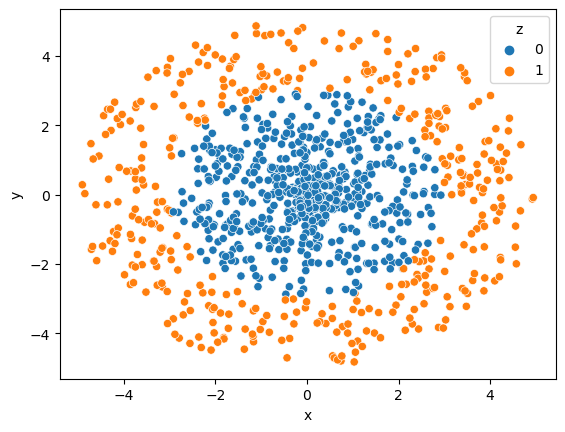

In [25]:
X= []
Y = []


import random 
import math
def samplePoint():
    t =  random.random()*2*np.pi
    r = random.uniform(0, 5)
    return np.array([r*np.cos(t),r*np.sin(t)])
# for i in np.arange(0,26,.1):
#     for x in np.arange(-5,5,0.1):
#         X.append(x)
#         X.append(x)
#         Y.append(np.sqrt((i) - (x**2)))
#         Y.append(-1*np.sqrt((i) - (x**2)))
for i in range(1000):
    p = samplePoint()
    X.append(p[0])
    Y.append(p[1])
df = pd.DataFrame()
df["x"] = X
df["y"] = Y
df["z"] = df["x"]**2 + df["y"]**2
z = []
for i in df["z"] :
    if i <= 9:
        z.append(0)
    else :
        z.append(1)
df["z"] = z
import seaborn as sns
df = df.dropna()
sns.scatterplot(x = "x",y = "y",hue = "z",data = df)

In [41]:
clf1 = GNBayes(3)
x_train = df.drop(["z"],axis = 1)
y_train = df[["z"]]
y_train.index,x_train.index = [i for i in range(len(y_train))],[i for i in range(len(x_train))]
clf1.Train(x_train,y_train)


In [42]:
# 
clf1.covmat

[array([[1.50138592, 0.02568454],
        [0.02568454, 1.46704387]]),
 array([[8.35758877, 0.08552698],
        [0.08552698, 8.00662906]])]

In [43]:
mat = clf1.covmat[0]


In [44]:
len(y_train)

1000

IndexError: list index out of range

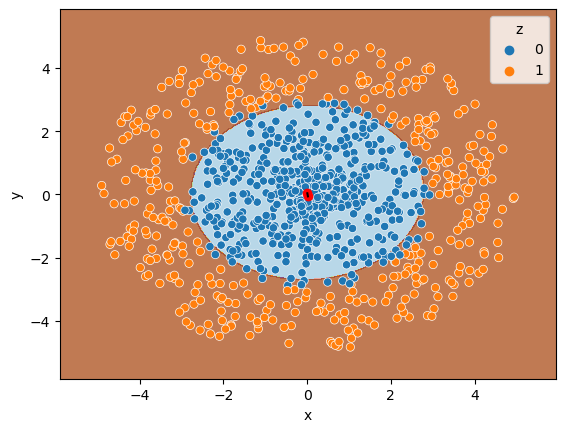

In [45]:
clf1.plotDecisionBoundary(df)